<a href="https://colab.research.google.com/github/CapiAlex/Momento3_Producto_1500/blob/main/Analiticayvista_boeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('Boeing_limpio.csv', sep=';')

In [3]:
datos.head(10)

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
0,Argentina,Aerolineas Argentinas,NaN,CF,737 MAX,Sep,2016,South America,0,9,9
1,Australia,BDS Australia P-8,NaN,CF,737-800A,Mar,2021,Oceania,0,2,2
2,Australia,Qantas Airways,NaN,GE,787-9,May,2018,Oceania,0,3,3
3,Australia,Virgin Australia Airlines,NaN,CF,737 MAX,Nov,2020,Oceania,0,25,25
4,Azerbaijan,Silk Way West Airlines,NaN,GE,777F,Apr,2021,Central Asia,0,5,5
5,Bahrain,Gulf Air,NaN,RR,787-9,Jan,2008,Middle East,0,1,1
6,Bahrain,Gulf Air,NaN,RR,787-9,Apr,2009,Middle East,0,8,4
7,Brazil,GOL Linhas Aereas,NaN,CF,737 MAX,May,2013,South America,0,21,17
8,Brazil,GOL Linhas Aereas,NaN,CF,737 MAX,Jul,2018,South America,0,15,8
9,Brazil,GOL Linhas Aereas,NaN,CF,737 MAX,Jul,2021,South America,0,4,4


In [10]:
list(datos['Country'].drop_duplicates())

['Argentina',
 'Australia',
 'Azerbaijan',
 'Bahrain',
 'Brazil',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Denmark',
 'Dominican Republic',
 'Ethiopia',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Malaysia',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Poland',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'Taiwan',
 'Tanzania, United Republic of',
 'Turkey',
 'Ukraine',
 'Unidentified',
 'United Arab Emirates',
 'United Kingdom',
 'USA',
 'Vietnam',
 'All']

In [11]:
America = ['Argentina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Dominican Republic', 'Panama','USA']
seleccion = datos['Country'].isin(America)
datos = datos[seleccion]

In [12]:
datos['Country'].drop_duplicates()

0               Argentina
7                  Brazil
14                 Canada
20                  Chile
31               Colombia
33     Dominican Republic
104                Panama
246                   USA
Name: Country, dtype: object

In [13]:
grupo_America = datos.groupby('Country')

In [14]:
grupo_America.groups

{'Argentina': [0], 'Brazil': [7, 8, 9, 10, 11, 12, 13], 'Canada': [14, 15, 16, 17], 'Chile': [20], 'Colombia': [31], 'Dominican Republic': [33], 'Panama': [104, 105], 'USA': [246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333]}

In [19]:
for countries, data in grupo_America:
    print('{} -> {}'.format(countries, data['Order Total'].mean().round(2)))


Argentina -> 9.0
Brazil -> 302210423.14
Canada -> 63631.25
Chile -> 6.0
Colombia -> 2.0
Dominican Republic -> 20.0
Panama -> 220.5
USA -> 1.5753430549103987e+123


In [20]:
grupo_America['Order Total'].describe().round(2)

,count,unique,top,freq
Country,,,,
Argentina,1,1,9,1
Brazil,7,7,21,1
Canada,4,4,25,1
Chile,1,1,6,1
Colombia,1,1,2,1
Dominican Republic,1,1,20,1
Panama,2,2,44,1
USA,88,31,1,21


In [21]:
grupo_America['Order Total'].agg(['min', 'max']).rename(columns = {'min': 'Min', 'max': 'Max'})

,Min,Max
Country,,
Argentina,9,9
Brazil,15,9
Canada,25,52
Chile,6,6
Colombia,2,2
Dominican Republic,20,20
Panama,1,44
USA,1,9


In [22]:
plt.rc('figure', figsize= (10,5))

Text(0.5, 1.0, 'Mean Total Orders by Country')

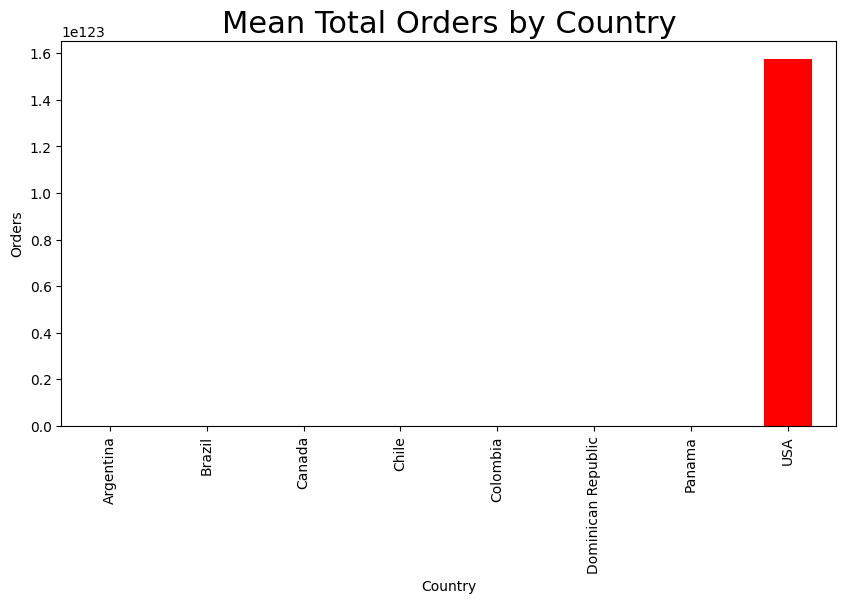

In [35]:
fig = grupo_America['Order Total'].mean().plot.bar(color = 'red')
fig.set_ylabel('Orders')
fig.set_title("Mean Total Orders by Country", {'fontsize': 22})

In [36]:
fig = grupo_America['Order Total'].max().plot.line(color = 'blue')
fig.set_ylabel('Orders')
fig.set_title("Max orders by country", {'fontsize': 22})

TypeError: ignored

Text(0.5, 1.0, 'Orders by country')

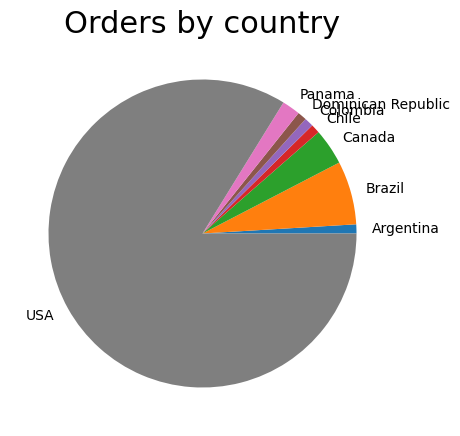

In [42]:
fig = grupo_America['Order Total'].count().plot.pie()
fig.set_ylabel('')
fig.set_title("Orders by country", {'fontsize': 22})